In [0]:
import pandas as pd
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


In [0]:
# Read a Delta table
df = spark.read.format("delta").load("dbfs:/user/hive/warehouse/spotify_2000")
df = df.toPandas()


In [0]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for dimensionality reduction
numeric_features = df.select_dtypes(include=['int', 'float']).columns
df_numeric = df[numeric_features]

# Fill missing values if any
df_numeric = df_numeric.fillna(df_numeric.mean())

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA(n_components=2)  # Adjust the number of components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


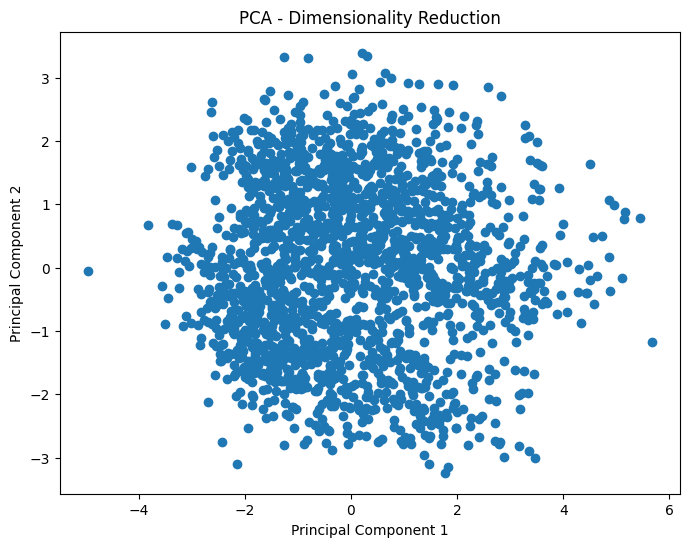

In [0]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dimensionality Reduction')
display(plt.show())  # Use display() for plotting in Databricks notebooks
